In [1]:
from emlib import emlib

DEBUG -211- Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
def NPZNB_int(t,initial,dtinput,constants):

    P = initial[1]             # phytoplankton
    B = initial[0]             # benthos
    Z = initial[2]             # zooplankton
    DIN = initial[3]           # dissolved inorganic
    DON = initial[4]           # dissolved organic
    ddin = dtinput.Val("ddin") #Concentration by day from WRTDS model 2 columns date and ddin Units are mg/L N
    ddon = dtinput.Val("ddon") #Concentration by day from WRTDS model 2 columns date and ddon mg/l N
    
    i = constants.Val("i")      #irradiance
    Pg = constants.Val("Pg")    # max P growth
    Bg = constants.Val("Bg")    # max B growth
    e = constants.Val("e")      # Z ingestion
    Zm = constants.Val("Zm")    # Z mortality
    Pm = constants.Val("Pm")    # P mortality
    Bm = constants.Val("Bm")    # B mortality
    Pe = constants.Val("Pe")    # P excretion
    Be = constants.Val("Be")    # B excretion
    Pr = constants.Val("Pr")    # P recycle
    h = constants.Val("h")      # Z grazing
    s = constants.Val("s")      # sedimentation
    
    P_dot = (i * Pg * P * DIN) + (Pr * DON * P) - (h * P * Z) - (Pm * P * P) - (Pe * P)
    B_dot = (Bg * B)/ (1 + Bg * B) * (DON + DIN) - (Bm * B * B) - (Be * B)
    Z_dot = ((2 * e - 1)*h * P * Z) - (Zm * Z * Z)-(0.8* (1 - e) * h * P * Z)-(0.2 * (1 - e) * h * P * Z)
   
    
    DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B)+  (Pe * P) \
                - (i * Pg * P * DIN) - ((Bg * B)/ (1 + Bg * B) * (DIN))
    DON_dot = ddon + (Bm * B * B)  +(Pm * P * P)  + (Zm * Z * Z)  + (0.2 * (1 - e) * h * P * Z) \
             - (Pr * DON * P)  - ((Bg * B)/ (1 + Bg * B) * (DON))  - (s * DON)
    return [P_dot, B_dot, Z_dot, DIN_dot, DON_dot]

In [3]:
NPZNB = emlib.Model(NPZNB_int) #save the model

INFO -1104- New Model(1): NPZNB_int
INFO -1116- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1130- Integrator:vode/bdf order:12 nsteps:3000 dt:1


In [4]:
nutrients= emlib.TimeSeries(dirname="Data",filename="Nueces_input2.csv") #loading in input timeseries data ddin and ddon in same file

INFO -879- New TimeSeries instance: 1
DEBUG -951- New INPUT table DataNueces_input2.csv['ï»¿Date', 'ddin', 'ddon']
DEBUG -962- Saved 1113 rows and 2 columns
DEBUG -964- Converted dates to contiguous np.array
DEBUG -966- Converted input data to contiguous np.array


In [5]:
PTest = emlib.Observation ("P", dirname="Data",filename= "NB_Chl_Calibrate.csv")

DEBUG -739- ['DATE', 'P']
DEBUG -741- New OBS for value:P COLMS:1 DataNB_Chl_Calibrate.csv
INFO -758- Read file DataNB_Chl_Calibrate.csv 9 Observations for value P


In [6]:
NPZNBcalibration = emlib.Calibration()
NPZNBcalibration.Add("i",val=0.5, min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Pg",val=0.15,min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Bg",val=0.15,min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("e",val=0.1,min= 0.001, max= 1.0)#from Turner 2014
NPZNBcalibration.Add("Zm",val=0.3,min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Pm",val=0.5,min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Bm",val=0.5,min= 0.001, max= 3.0)#from Turner 2014
NPZNBcalibration.Add("Pe",val=0.05,min= 0.001, max= 3.0)#random number
NPZNBcalibration.Add("Be",val=0.05,min= 0.001, max= 3.0)#random number
NPZNBcalibration.Add("Pr",val=0.15,min= 0.001, max= 3.0)#random number
NPZNBcalibration.Add("h",val=0.15,min=0.01,max=2.0)#random moving number
NPZNBcalibration.Add("s",val=0.25,min= .001, max= 2.0)#from Turner 2014
NPZNBcalibration.initial=[1.0,1.0,1.0,1.0,1.0]

INFO -352- New Calibration instance: 1
DEBUG -595- C:1 i 0.5 False
DEBUG -595- C:2 Pg 0.15 False
DEBUG -595- C:3 Bg 0.15 False
DEBUG -595- C:4 e 0.1 False
DEBUG -595- C:5 Zm 0.3 False
DEBUG -595- C:6 Pm 0.5 False
DEBUG -595- C:7 Bm 0.5 False
DEBUG -595- C:8 Pe 0.05 False
DEBUG -595- C:9 Be 0.05 False
DEBUG -595- C:10 Pr 0.15 False
DEBUG -595- C:11 h 0.15 False
DEBUG -595- C:12 s 0.25 False


DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -2515- update_title_pos
DEBUG -1254- findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\mrohal\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG -1254- findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\mrohal\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\

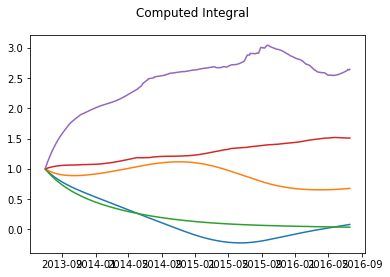

In [7]:
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=NPZNBcalibration,TimeSeries= nutrients, dt=0.01) 
legend = ["P", "B", "Z", "DIN","DON"]
NPZNB.Draw()

In [ ]:
best = NPZNB.Calibrate (NPZNBcalibration, PTest, runs =10000, TimeSeries= nutrients)

WARNING -1352- No fitness method provided, assuming GF_BruteForceMSE
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:4.8 RMSE:10.319 RANGE%0 WMSE:21.0
DEBUG -1452- New fitness object:1
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
C:\Users\mrohal\AppData\Local\Continuum\ana

New Best Calibration
Label	Value	Min	Max	ISConst	Desc
i 	 0.5329224205347589 	 0.001 	 3.0 	 False 	 None
Pg 	 2.3952691515590274 	 0.001 	 3.0 	 False 	 None
Bg 	 1.799124690384593 	 0.001 	 3.0 	 False 	 None
e 	 0.4288568086418859 	 0.001 	 1.0 	 False 	 None
Zm 	 0.7802432296063294 	 0.001 	 3.0 	 False 	 None
Pm 	 0.35539311623260983 	 0.001 	 3.0 	 False 	 None
Bm 	 0.9854654730106208 	 0.001 	 3.0 	 False 	 None
Pe 	 2.6262053121076323 	 0.001 	 3.0 	 False 	 None
Be 	 0.8349239868478557 	 0.001 	 3.0 	 False 	 None
Pr 	 2.515490317322696 	 0.001 	 3.0 	 False 	 None
h 	 1.598001816784331 	 0.01 	 2.0 	 False 	 None
s 	 0.11661927521350683 	 0.001 	 2.0 	 False 	 None


DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.3 RMSE:10.584 RANGE%0 WMSE:21.2
DEBUG -1452- New fitness object:9
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.2 RMSE:10.592 RANGE%0 WMSE:21.2
DEBUG -1452- New fitness object:10
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:20

New Best Calibration
Label	Value	Min	Max	ISConst	Desc
i 	 0.6412435394845223 	 0.001 	 3.0 	 False 	 None
Pg 	 0.8270893668466208 	 0.001 	 3.0 	 False 	 None
Bg 	 1.4427153832585944 	 0.001 	 3.0 	 False 	 None
e 	 0.807070756191111 	 0.001 	 1.0 	 False 	 None
Zm 	 0.9203006068971725 	 0.001 	 3.0 	 False 	 None
Pm 	 1.0145395234857084 	 0.001 	 3.0 	 False 	 None
Bm 	 0.09319005976477457 	 0.001 	 3.0 	 False 	 None
Pe 	 1.2787575313601691 	 0.001 	 3.0 	 False 	 None
Be 	 1.6994754534440812 	 0.001 	 3.0 	 False 	 None
Pr 	 2.6954279864986197 	 0.001 	 3.0 	 False 	 None
h 	 0.9159703968136695 	 0.01 	 2.0 	 False 	 None
s 	 0.2689462440643437 	 0.001 	 2.0 	 False 	 None


DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:9.9 RMSE:9.76 RANGE%0 WMSE:20.0
DEBUG -1452- New fitness object:15
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:1.4 RMSE:10.685 RANGE%0 WMSE:21.1
DEBUG -1452- New fitness object:16
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddi

DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:11.489 RANGE%0 WMSE:19.8
DEBUG -1452- New fitness object:27
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:1.8 RMSE:10.638 RANGE%0 WMSE:21.0
DEBUG -1452- New fitness object:28
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg',

DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:12.1 RANGE%0 WMSE:19.1
DEBUG -1452- New fitness object:41
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+S

DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.4 RMSE:10.572 RANGE%0 WMSE:21.3
DEBUG -1452- New fitness object:54
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:12.042 RANGE%0 WMSE:18.5
DEBUG -1452- New fitness object:55
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Inte

New Best Calibration
Label	Value	Min	Max	ISConst	Desc
i 	 2.0981110701588546 	 0.001 	 3.0 	 False 	 None
Pg 	 0.6329769207828768 	 0.001 	 3.0 	 False 	 None
Bg 	 2.5917944509337234 	 0.001 	 3.0 	 False 	 None
e 	 0.934072773316385 	 0.001 	 1.0 	 False 	 None
Zm 	 2.0522388001869953 	 0.001 	 3.0 	 False 	 None
Pm 	 2.742718296022379 	 0.001 	 3.0 	 False 	 None
Bm 	 0.024906252434468125 	 0.001 	 3.0 	 False 	 None
Pe 	 0.012754420117068208 	 0.001 	 3.0 	 False 	 None
Be 	 1.861895946084896 	 0.001 	 3.0 	 False 	 None
Pr 	 2.0548732455602066 	 0.001 	 3.0 	 False 	 None
h 	 0.651669719049478 	 0.01 	 2.0 	 False 	 None
s 	 0.046307247416615974 	 0.001 	 2.0 	 False 	 None


DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:13.226 RANGE%0 WMSE:21.8
DEBUG -1452- New fitness object:58
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:10.841 RANGE%0 WMSE:20.4
DEBUG -1452- New fitness object:59
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2

DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.0 RMSE:1.9029969236079464e+45 RANGE%0 WMSE:4.625139248379616e+45
DEBUG -1452- New fitness object:72
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration

DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.8 RMSE:10.529 RANGE%0 WMSE:21.2
DEBUG -1452- New fitness object:85
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:0.2 RMSE:10.808 RANGE%0 WMSE:21.1
DEBUG -1452- New fitness object:86
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2

DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.4 RMSE:10.576 RANGE%0 WMSE:20.9
DEBUG -1452- New fitness object:99
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DE

New Best Calibration
Label	Value	Min	Max	ISConst	Desc
i 	 1.6952222511733068 	 0.001 	 3.0 	 False 	 None
Pg 	 1.7539219055406206 	 0.001 	 3.0 	 False 	 None
Bg 	 1.3222436136806794 	 0.001 	 3.0 	 False 	 None
e 	 0.1811587747339541 	 0.001 	 1.0 	 False 	 None
Zm 	 1.5966732139219548 	 0.001 	 3.0 	 False 	 None
Pm 	 1.979527075928004 	 0.001 	 3.0 	 False 	 None
Bm 	 0.1356842926559985 	 0.001 	 3.0 	 False 	 None
Pe 	 2.645528335032102 	 0.001 	 3.0 	 False 	 None
Be 	 0.9650609131539812 	 0.001 	 3.0 	 False 	 None
Pr 	 1.7845863849559216 	 0.001 	 3.0 	 False 	 None
h 	 0.3055109515037494 	 0.01 	 2.0 	 False 	 None
s 	 0.015751386324058914 	 0.001 	 2.0 	 False 	 None


DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:13.0 RMSE:9.428 RANGE%0 WMSE:19.2
DEBUG -1452- New fitness object:102
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 1113 Remaining:1113
DEBUG -1204- Integration dT:500 of 1113 Remaining:613
DEBUG -1204- Integration dT:1000 of 1113 Remaining:113
DEBUG -1216- Completed Integration, created np.array shape:(1113, 5)
DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #9 Xtot3.292 RMSD%:2.4 RMSE:10.573 RANGE%0 WMSE:21.2
DEBUG -1452- New fitness object:103
DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:2013-07-02 Ending:1113
DEBUG -1176- Passing DtInput:[

In [11]:
best.Print()

Label	Value	Min	Max	ISConst	Desc
i 	 0.225163385493642 	 0.001 	 3.0 	 False 	 None
Pg 	 2.417296733173937 	 0.001 	 3.0 	 False 	 None
Bg 	 1.548831673626314 	 0.001 	 3.0 	 False 	 None
e 	 0.19537447673538547 	 0.001 	 1.0 	 False 	 None
Zm 	 2.384454166638453 	 0.001 	 3.0 	 False 	 None
Pm 	 0.36498742479667634 	 0.001 	 3.0 	 False 	 None
Bm 	 0.23293951115607514 	 0.001 	 3.0 	 False 	 None
Pe 	 2.4759950302694786 	 0.001 	 3.0 	 False 	 None
Be 	 0.2891946538801077 	 0.001 	 3.0 	 False 	 None
Pr 	 2.6503373134788513 	 0.001 	 3.0 	 False 	 None
h 	 0.44396203099604226 	 0.01 	 2.0 	 False 	 None
s 	 0.050091246820577286 	 0.001 	 2.0 	 False 	 None


DEBUG -1137- ODEINT Initials:1.01.01.01.01.0
DEBUG -1175- Starting:1991-01-01 Ending:4442
DEBUG -1176- Passing DtInput:['ddin', 'ddon']
DEBUG -1182- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1204- Integration dT:0 of 4442 Remaining:4442
DEBUG -1204- Integration dT:500 of 4442 Remaining:3942
DEBUG -1204- Integration dT:1000 of 4442 Remaining:3442
DEBUG -1204- Integration dT:1500 of 4442 Remaining:2942
DEBUG -1204- Integration dT:2000 of 4442 Remaining:2442
DEBUG -1204- Integration dT:2500 of 4442 Remaining:1942
DEBUG -1204- Integration dT:3000 of 4442 Remaining:1442
DEBUG -1204- Integration dT:3500 of 4442 Remaining:942
DEBUG -1204- Integration dT:4000 of 4442 Remaining:442
DEBUG -1216- Completed Integration, created np.array shape:(4442, 5)
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos


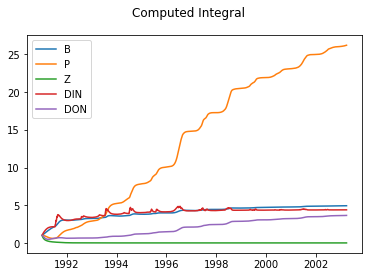

In [12]:
NPZNB.Integrate(NPZNBcalibration.initial, Calibration=best,TimeSeries= nutrients, dt=0.01) 
legend = ["P", "B", "Z", "DIN","DON"]
NPZNB.Draw(legend=legend)

In [13]:
BVal = emlib.Observation ("B", dirname="Data",filename= "NB_Count_Validate.csv")

DEBUG -739- ['DATE', 'B']
DEBUG -741- New OBS for value:B COLMS:1 DataNB_Count_Validate.csv
INFO -758- Read file DataNB_Count_Validate.csv 30 Observations for value B


DEBUG -226- -STDEV	EXP	+STDEV	ISRANGE?
DEBUG -268- GFMODEL #51 Xtot2.474 RMSD%:48.7 RMSE:3.139 RANGE%58.8 WMSE:10.8
DEBUG -1452- New fitness object:20001
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos


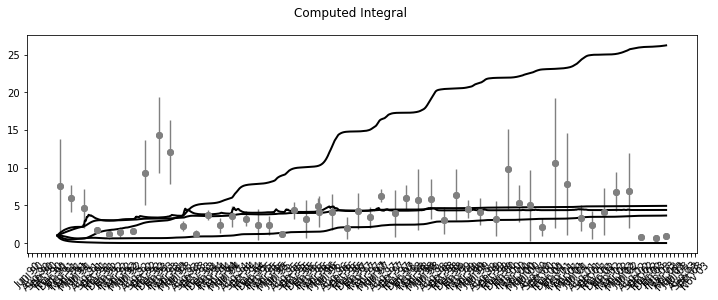

GFMODEL #51 Xtot:2.474 RMSD:48.7 RMSE:3.139 RANGE%58.8 MSER:11.3 WMSE:10.8


In [14]:
NPZNB.Validate(BTest, graph =True) 
NPZNB.fit.Print()